In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

df=pd.DataFrame()
for no in range(10,38):
    temp=pd.read_csv("Processed Data/fileID"+str(no)+"_ProcessedTripData.csv",header= None)
    #print(temp)  
    df=pd.concat([df,temp])


df.columns=['Time','Vehicle Speed','SHIFT','Engine Load','Total Acceleration','Engine RPM','Pitch','Lateral Acceleration','Passenger Count','Car Load','AC Status','Window Opening','Radio Volume','Rain Intensity','Visibility','Driver Wellbeing','Driver Rush']

df=df.drop(['Time', 'Passenger Count', 'AC Status','Window Opening','Radio Volume','Rain Intensity','Visibility','Driver Wellbeing','Driver Rush'],axis=1)

#df=df.drop(['Time','Engine Load','Total Acceleration','Pitch','Lateral Acceleration','Passenger Count','Car Load','AC Status','Window Opening','Radio Volume','Rain Intensity','Visibility','Driver Wellbeing','Driver Rush'],axis=1)

newdf = df[df.SHIFT != 0]
newdf = newdf.reset_index(drop=True)
df=newdf

df.describe()

count=1
x="Vehicle Speed"
y="Engine RPM"
colors=['red','green','blue','brown','black','yellow','orange']

temp=df.SHIFT
df=df.drop("SHIFT",axis=1)
df.insert(len(df.columns),"SHIFT",temp)


X = df[df.columns[:-1]]
y = df.SHIFT

x_train, x_test, y_train, y_test=train_test_split(X, y, train_size=1093902, test_size=364634, random_state=0)


model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train, y_train)
accuracy=model.score(x_test, y_test)
print("Model Accuracy : "+str(accuracy*100)+" %")



/home/vortex/isep/project/datasets/gear-box-prediction/TripData/Processed Data/fileID11_ProcessedTripData.csv
/home/vortex/isep/project/datasets/gear-box-prediction/TripData/Processed Data/fileID32_ProcessedTripData.csv
/home/vortex/isep/project/datasets/gear-box-prediction/TripData/Processed Data/fileID13_ProcessedTripData.csv
/home/vortex/isep/project/datasets/gear-box-prediction/TripData/Processed Data/fileID9_ProcessedTripData.csv
/home/vortex/isep/project/datasets/gear-box-prediction/TripData/Processed Data/fileID26_ProcessedTripData.csv
/home/vortex/isep/project/datasets/gear-box-prediction/TripData/Processed Data/fileID19_ProcessedTripData.csv
/home/vortex/isep/project/datasets/gear-box-prediction/TripData/Processed Data/fileID2_ProcessedTripData.csv
/home/vortex/isep/project/datasets/gear-box-prediction/TripData/Processed Data/fileID33_ProcessedTripData.csv
/home/vortex/isep/project/datasets/gear-box-prediction/TripData/Processed Data/fileID36_ProcessedTripData.csv
/home/vortex

/tmp/ipykernel_26231/2898973870.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
/tmp/ipykernel_26231/2898973870.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
/tmp/ipykernel_26231/2898973870.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
/tmp/ipykernel_26231/2898973870.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
/tmp/ipykernel_26231/2898973870.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
/tmp/ipykernel_26231/2898973870.py:

Model Accuracy : 99.96462205938009 %


Plot

Model Accuracy: 72.61%


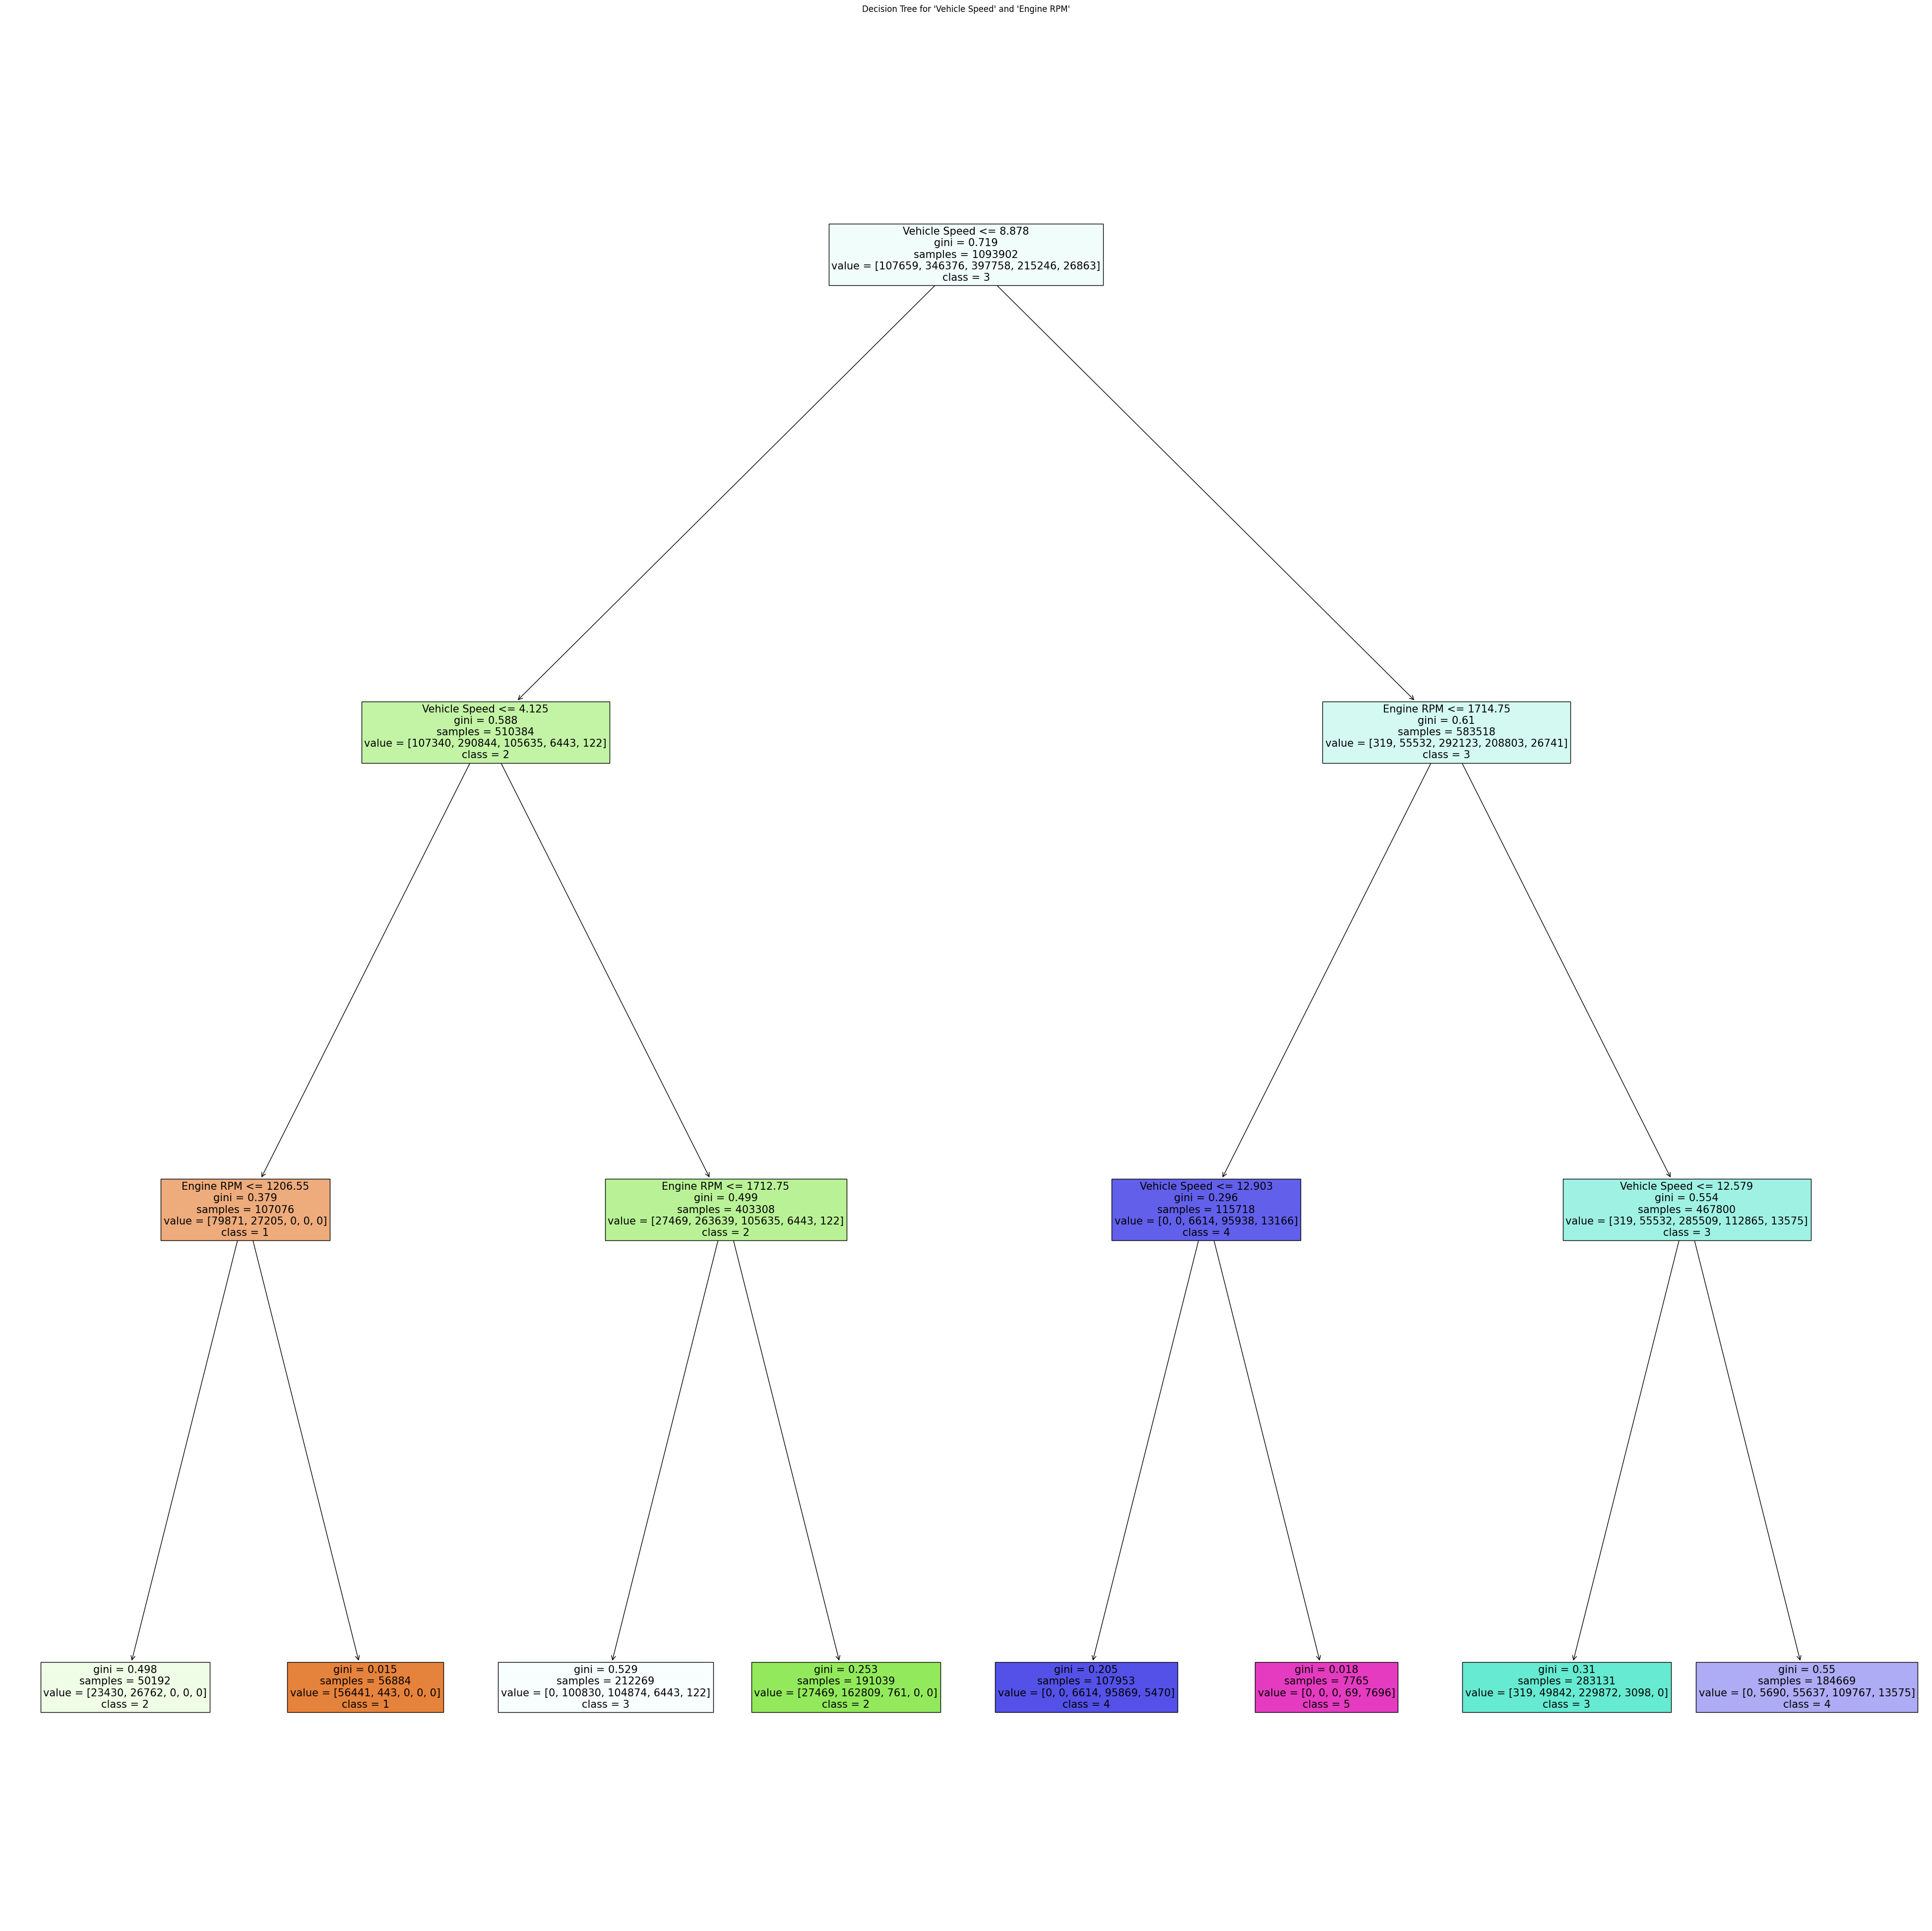

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# ... (your code for loading and preprocessing data)

# Define the features and target variable
X = df[['Vehicle Speed', 'Engine RPM']]  # Use 'Vehicle Speed' and 'Engine RPM' as features
y = df['SHIFT']  # Target variable

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=1093902, test_size=364634, random_state=0)

# Create a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(max_depth=3)  # You can adjust the depth as needed

# Fit the model to the training data
decision_tree.fit(x_train, y_train)

# Make predictions on the test data
y_pred = decision_tree.predict(x_test)

# Calculate and print the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: {:.2f}%".format(accuracy * 100))

# Plot the decision tree
plt.figure(figsize=(50, 50))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=[str(i) for i in range(1, 6)], fontsize=15)
plt.title("Decision Tree for 'Vehicle Speed' and 'Engine RPM'")
plt.show()


Model Accuracy: 72.61%


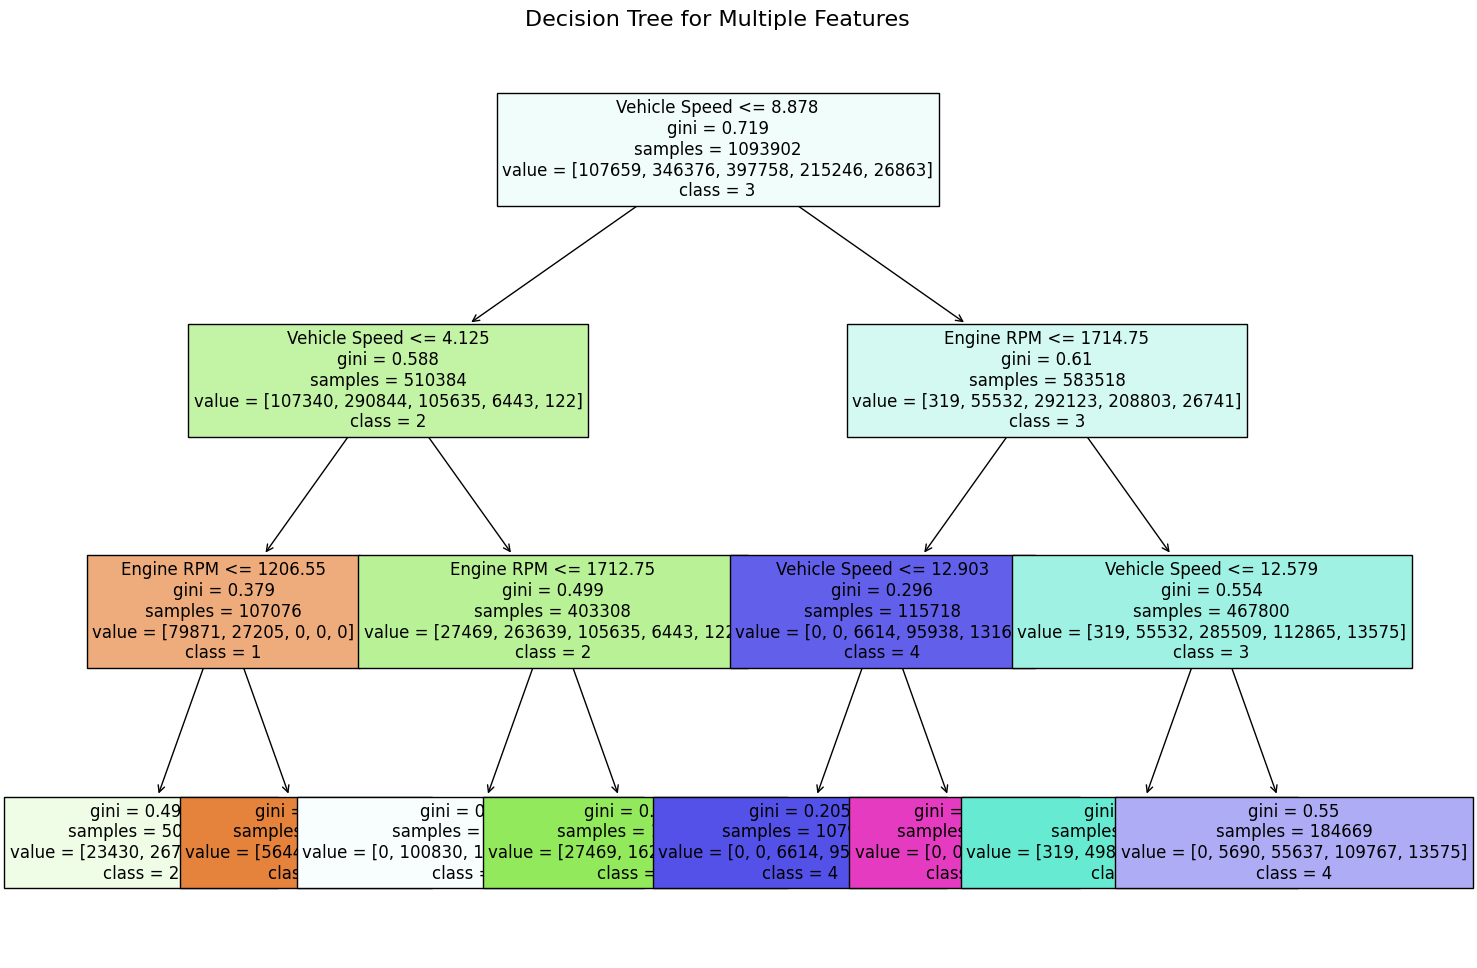

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# ... (your code for loading and preprocessing data)

# Define the features and target variable
selected_features = ['Vehicle Speed', 'Engine RPM']
X = df[selected_features]  # Use more features
y = df['SHIFT']  # Target variable

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=1093902, test_size=364634, random_state=0)

# Create a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(max_depth=3)  # You can adjust the depth as needed

# Fit the model to the training data
decision_tree.fit(x_train, y_train)

# Make predictions on the test data
y_pred = decision_tree.predict(x_test)

# Calculate and print the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: {:.2f}%".format(accuracy * 100))

# Plot the decision tree
plt.figure(figsize=(17, 12))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=[str(i) for i in range(1, 6)], fontsize=12)
plt.title("Decision Tree for Multiple Features", fontsize=16)
plt.show()
